In [120]:
!pip install --upgrade pip
!pip install seaborn

In [103]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [104]:
data = pd.read_csv('Training_Dataset_2.csv')
data.head()

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,...,FIT602.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,2024-05-06 17:00:00,2,729.787300,0.0,1,2,1,2,2.656842,54.857727,...,2.578893,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
1,2024-05-06 17:00:01,2,729.787300,0.0,1,2,1,2,2.658123,54.697514,...,2.580335,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
2,2024-05-06 17:00:02,2,731.632141,0.0,1,2,1,2,2.659276,54.697514,...,2.582097,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
3,2024-05-06 17:00:03,2,731.749939,0.0,1,2,1,2,2.660815,54.697514,...,2.587864,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
4,2024-05-06 17:00:04,2,732.377900,0.0,1,2,1,2,2.660815,54.473213,...,2.590747,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active


* Check for the AIT values for every minute. 
* The data is extracted for every second. 


In [105]:
cols = data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129601 entries, 0 to 129600
Data columns (total 83 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   t_stamp        129601 non-null  object 
 1   P1_STATE       129601 non-null  int64  
 2   LIT101.Pv      129601 non-null  float64
 3   FIT101.Pv      129601 non-null  float64
 4   MV101.Status   129601 non-null  int64  
 5   P101.Status    129601 non-null  int64  
 6   P102.Status    129601 non-null  int64  
 7   P2_STATE       129601 non-null  int64  
 8   FIT201.Pv      129601 non-null  float64
 9   AIT201.Pv      129601 non-null  float64
 10  AIT202.Pv      129601 non-null  float64
 11  AIT203.Pv      129601 non-null  float64
 12  MV201.Status   129601 non-null  int64  
 13  P201.Status    129601 non-null  int64  
 14  P202.Status    129601 non-null  int64  
 15  P203.Status    129601 non-null  int64  
 16  P204.Status    129601 non-null  int64  
 17  P205.Status    129601 non-nul

# There are 6 States
* P1 State: 
   *   'P1_STATE','LIT101.Pv', 'FIT101.Pv', 'MV101.Status',
       'P101.Status', 'P102.Status'
* P2 State: 
  *    'P2_STATE','FIT201.Pv', 'AIT201.Pv',
       'AIT202.Pv', 'AIT203.Pv', 'MV201.Status', 'P201.Status', 'P202.Status',
       'P203.Status', 'P204.Status', 'P205.Status', 'P206.Status',
       'P207.Status', 'P208.Status', 'LS201.Alarm', 'LS202.Alarm',
       'LSL203.Alarm', 'LSLL203.Alarm'
* P3 State: 
  *    'P3_STATE','AIT301.Pv', 'AIT302.Pv',
       'AIT303.Pv', 'LIT301.Pv', 'FIT301.Pv', 'DPIT301.Pv', 'MV301.Status',
       'MV302.Status', 'MV303.Status', 'MV304.Status', 'P301.Status',
       'P302.Status'
* P4 State: 
  *    'P4_STATE', 'LIT401.Pv', 'FIT401.Pv', 'AIT401.Pv',
       'AIT402.Pv', 'P401.Status', 'P402.Status', 'P403.Status', 'P404.Status',
       'UV401.Status', 'LS401.Alarm',
* P5 State:
  *    'P5_STATE', 'FIT501.Pv', 'FIT502.Pv',
       'FIT503.Pv', 'FIT504.Pv', 'AIT501.Pv', 'AIT502.Pv', 'AIT503.Pv',
       'AIT504.Pv', 'PIT501.Pv', 'PIT502.Pv', 'PIT503.Pv', 'P501.Status',
       'P501.Speed', 'P502.Status', 'P502.Speed', 'MV501.Status',
       'MV502.Status', 'MV503.Status', 'MV504.Status'
* P6 State:
   *   'P6_STATE', 'LIT601.Pv',
       'LIT602.Pv', 'FIT601.Pv', 'FIT602.Pv', 'P601.Status', 'P602.Status',
       'P603.Status', 'LSH601.Alarm', 'LSL601.Alarm', 'LSH602.Alarm',
       'LSL602.Alarm', 'LSH603.Alarm', 'LSL603.Alarm'              



### P1 State

In [106]:
p1_state = data[["t_stamp","P1_STATE","LIT101.Pv","FIT101.Pv","MV101.Status","P101.Status","P102.Status"]]
p1_state= p1_state[:43200]

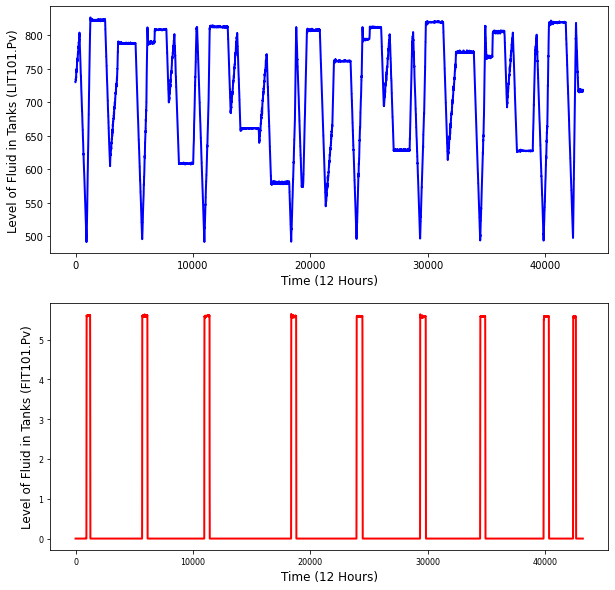

In [107]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2,1,1)
ax1.plot(p1_state['LIT101.Pv'],color = 'blue', linewidth=2)
ax1.set_xlabel('Time (12 Hours)', fontsize=12)
ax1.set_ylabel('Level of Fluid in Tanks (LIT101.Pv)', fontsize=12)

ax2 = plt.subplot(2,1,2)
ax2.plot(p1_state['FIT101.Pv'],color = 'red', linewidth=2)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.title('Level Indicator Transmitters', fontsize=12)
ax2.set_xlabel('Time (12 Hours)', fontsize=12)
ax2.set_ylabel('Level of Fluid in Tanks (FIT101.Pv)', fontsize=12)
plt.show()


### P2 State

In [108]:
p2_state = data[['t_stamp','P2_STATE','FIT201.Pv', 'AIT201.Pv','AIT202.Pv', 'AIT203.Pv', 'MV201.Status', 'P201.Status', 
                'P202.Status','P203.Status', 'P204.Status', 'P205.Status', 'P206.Status','P207.Status', 'P208.Status',
                  'LS201.Alarm', 'LS202.Alarm','LSL203.Alarm', 'LSLL203.Alarm']]
p2_state = p2_state[:43200]
p2_state.head()

,t_stamp,P2_STATE,FIT201.Pv,AIT201.Pv,AIT202.Pv,AIT203.Pv,MV201.Status,P201.Status,P202.Status,P203.Status,P204.Status,P205.Status,P206.Status,P207.Status,P208.Status,LS201.Alarm,LS202.Alarm,LSL203.Alarm,LSLL203.Alarm
0,2024-05-06 17:00:00,2,2.656842,54.857727,9.146245,163.419632,2,2,1,2,1,2,1,1,1,Inactive,Inactive,Inactive,Inactive
1,2024-05-06 17:00:01,2,2.658123,54.697514,9.141438,163.419632,2,2,1,2,1,2,1,1,1,Inactive,Inactive,Inactive,Inactive
2,2024-05-06 17:00:02,2,2.659276,54.697514,9.138875,163.419632,2,2,1,2,1,2,1,1,1,Inactive,Inactive,Inactive,Inactive
3,2024-05-06 17:00:03,2,2.660815,54.697514,9.135671,163.419632,2,2,1,2,1,2,1,1,1,Inactive,Inactive,Inactive,Inactive
4,2024-05-06 17:00:04,2,2.660815,54.473213,9.129262,163.163284,2,2,1,2,1,2,1,1,1,Inactive,Inactive,Inactive,Inactive


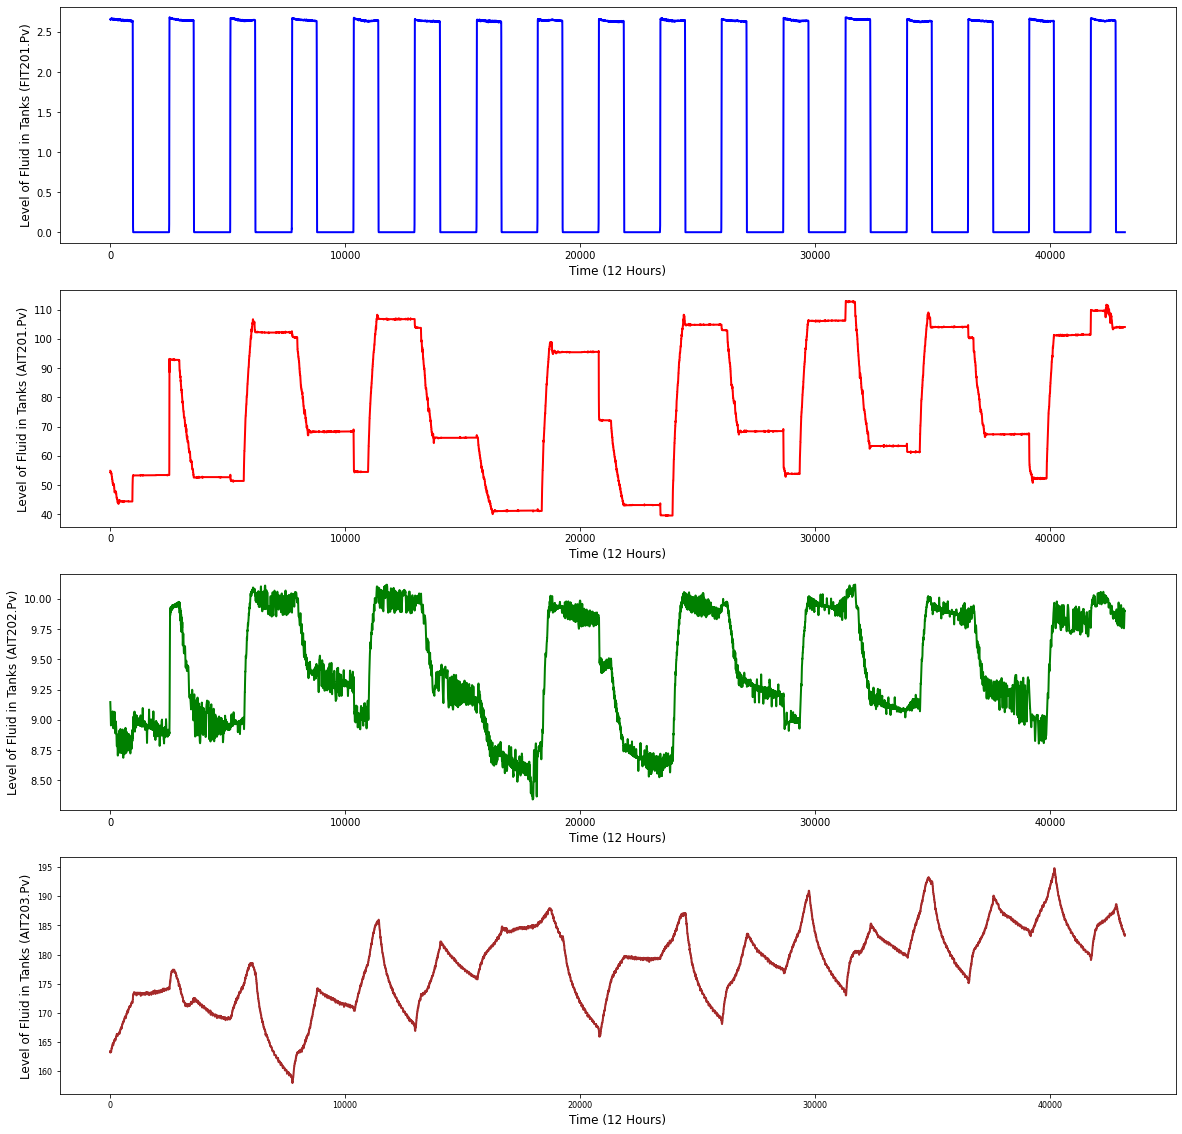

In [109]:
plt.figure(figsize=(20, 20))
ax1 = plt.subplot(4,1,1)
ax1.plot(p2_state['FIT201.Pv'],color = 'blue', linewidth=2)
ax1.set_xlabel('Time (12 Hours)', fontsize=12)
ax1.set_ylabel('Level of Fluid in Tanks (FIT201.Pv)', fontsize=12)

ax2 = plt.subplot(4,1,2)
ax2.plot(p2_state['AIT201.Pv'],color = 'red', linewidth=2)
ax2.set_xlabel('Time (12 Hours)', fontsize=12)
ax2.set_ylabel('Level of Fluid in Tanks (AIT201.Pv)', fontsize=12)

ax3 = plt.subplot(4,1,3)
ax3.plot(p2_state['AIT202.Pv'],color = 'green', linewidth=2)
ax3.set_xlabel('Time (12 Hours)', fontsize=12)
ax3.set_ylabel('Level of Fluid in Tanks (AIT202.Pv)', fontsize=12)

ax4 = plt.subplot(4,1,4)
ax4.plot(p2_state['AIT203.Pv'],color = 'brown', linewidth=2)
ax4.set_xlabel('Time (12 Hours)', fontsize=12)
ax4.set_ylabel('Level of Fluid in Tanks (AIT203.Pv)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

### P3 State

In [110]:
p3_state = data[['t_stamp','P3_STATE','AIT301.Pv', 'AIT302.Pv','AIT303.Pv', 'LIT301.Pv', 'FIT301.Pv', 'DPIT301.Pv', 'MV301.Status',
                 'MV302.Status', 'MV303.Status', 'MV304.Status', 'P301.Status','P302.Status']]
p3_state = p3_state[:43200]
p3_state.head()

,t_stamp,P3_STATE,AIT301.Pv,AIT302.Pv,AIT303.Pv,LIT301.Pv,FIT301.Pv,DPIT301.Pv,MV301.Status,MV302.Status,MV303.Status,MV304.Status,P301.Status,P302.Status
0,2024-05-06 17:00:00,7,7.906172,246.699539,26.186054,806.884460,1.809563,14.450349,1,2,1,1,2,1
1,2024-05-06 17:00:01,7,7.906172,246.853200,26.186054,806.884460,1.809563,14.395928,1,2,1,1,2,1
2,2024-05-06 17:00:02,7,7.906172,246.853200,25.929956,807.925842,1.808538,14.386324,1,2,1,1,2,1
3,2024-05-06 17:00:03,7,7.906172,246.853200,25.865930,807.925842,1.806361,14.367117,1,2,1,1,2,1
4,2024-05-06 17:00:04,7,7.906172,246.853200,25.865930,807.925842,1.805464,14.351110,1,2,1,1,2,1


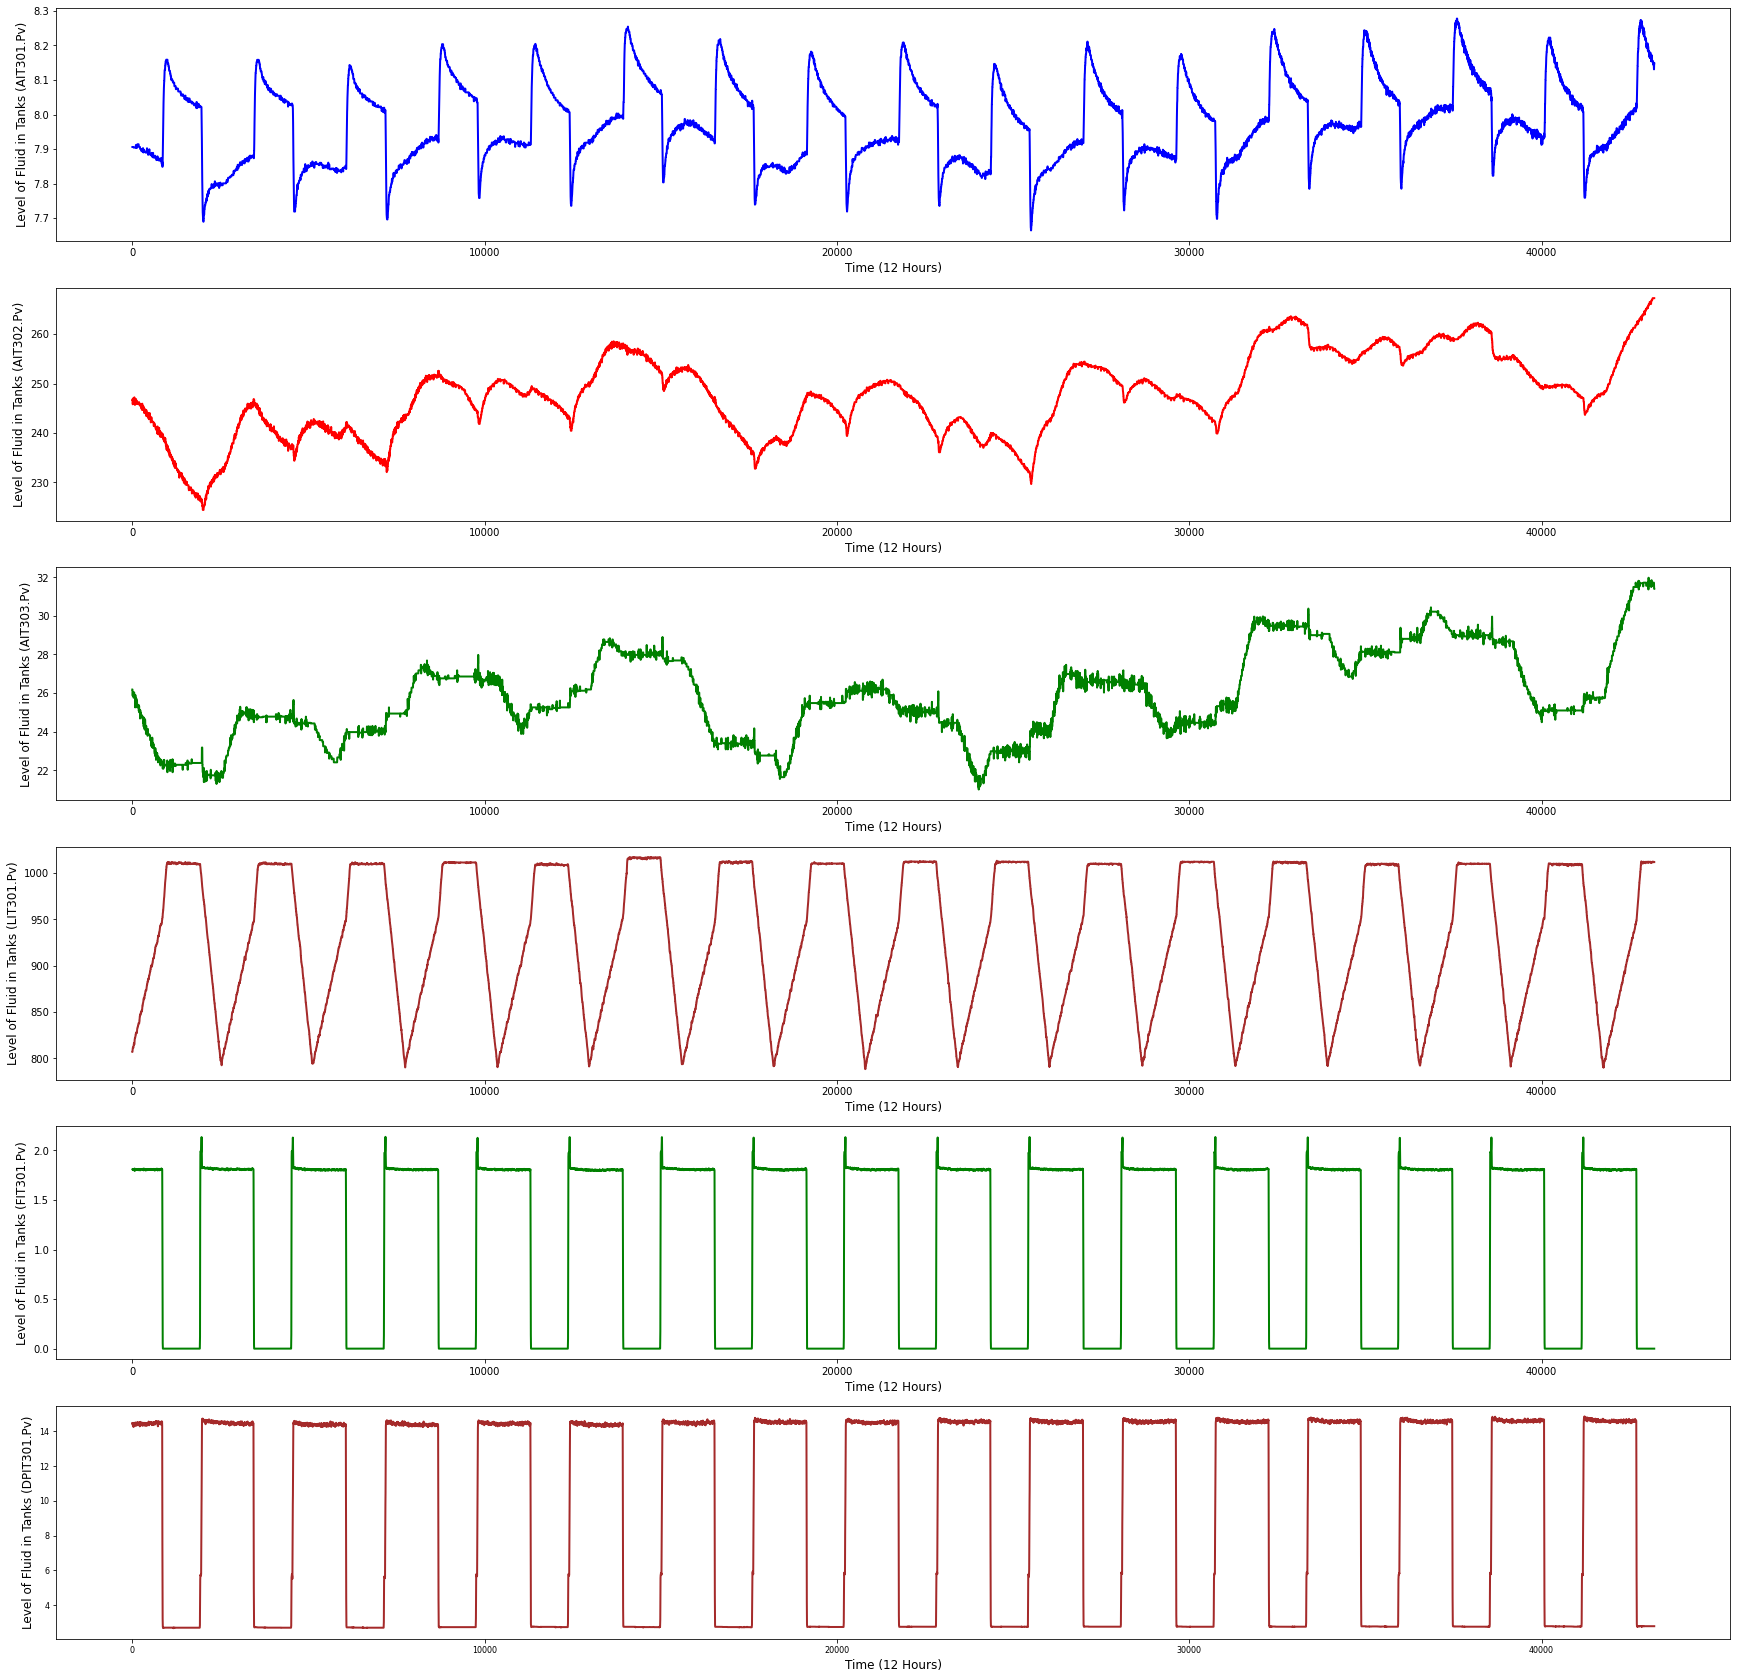

In [111]:
plt.figure(figsize=(30, 30))
ax1 = plt.subplot(6,1,1)
ax1.plot(p3_state['AIT301.Pv'],color = 'blue', linewidth=2)
ax1.set_xlabel('Time (12 Hours)', fontsize=12)
ax1.set_ylabel('Level of Fluid in Tanks (AIT301.Pv)', fontsize=12)

ax2 = plt.subplot(6,1,2)
ax2.plot(p3_state['AIT302.Pv'],color = 'red', linewidth=2)
ax2.set_xlabel('Time (12 Hours)', fontsize=12)
ax2.set_ylabel('Level of Fluid in Tanks (AIT302.Pv)', fontsize=12)

ax3 = plt.subplot(6,1,3)
ax3.plot(p3_state['AIT303.Pv'],color = 'green', linewidth=2)
ax3.set_xlabel('Time (12 Hours)', fontsize=12)
ax3.set_ylabel('Level of Fluid in Tanks (AIT303.Pv)', fontsize=12)

ax4 = plt.subplot(6,1,4)
ax4.plot(p3_state['LIT301.Pv'],color = 'brown', linewidth=2)
ax4.set_xlabel('Time (12 Hours)', fontsize=12)
ax4.set_ylabel('Level of Fluid in Tanks (LIT301.Pv)', fontsize=12)

ax5 = plt.subplot(6,1,5)
ax5.plot(p3_state['FIT301.Pv'],color = 'green', linewidth=2)
ax5.set_xlabel('Time (12 Hours)', fontsize=12)
ax5.set_ylabel('Level of Fluid in Tanks (FIT301.Pv)', fontsize=12)

ax6 = plt.subplot(6,1,6)
ax6.plot(p3_state['DPIT301.Pv'],color = 'brown', linewidth=2)
ax6.set_xlabel('Time (12 Hours)', fontsize=12)
ax6.set_ylabel('Level of Fluid in Tanks (DPIT301.Pv)', fontsize=12)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

### P4 State

In [112]:
p4_state = data[['t_stamp','P4_STATE', 'LIT401.Pv', 'FIT401.Pv', 'AIT401.Pv','AIT402.Pv', 'P401.Status', 'P402.Status',
                  'P403.Status', 'P404.Status', 'UV401.Status', 'LS401.Alarm']]
p4_state = p4_state[:43200]
p4_state.head()

,t_stamp,P4_STATE,LIT401.Pv,FIT401.Pv,AIT401.Pv,AIT402.Pv,P401.Status,P402.Status,P403.Status,P404.Status,UV401.Status,LS401.Alarm
0,2024-05-06 17:00:00,4,879.697500,1.024137,0,124.660347,2,1,2,1,2,Inactive
1,2024-05-06 17:00:01,4,879.505249,1.024137,0,124.660347,2,1,2,1,2,Inactive
2,2024-05-06 17:00:02,4,879.928200,1.024137,0,124.660347,2,1,2,1,2,Inactive
3,2024-05-06 17:00:03,4,879.735962,1.024778,0,124.660347,2,1,2,1,2,Inactive
4,2024-05-06 17:00:04,4,880.005100,1.024778,0,124.660347,2,1,2,1,2,Inactive


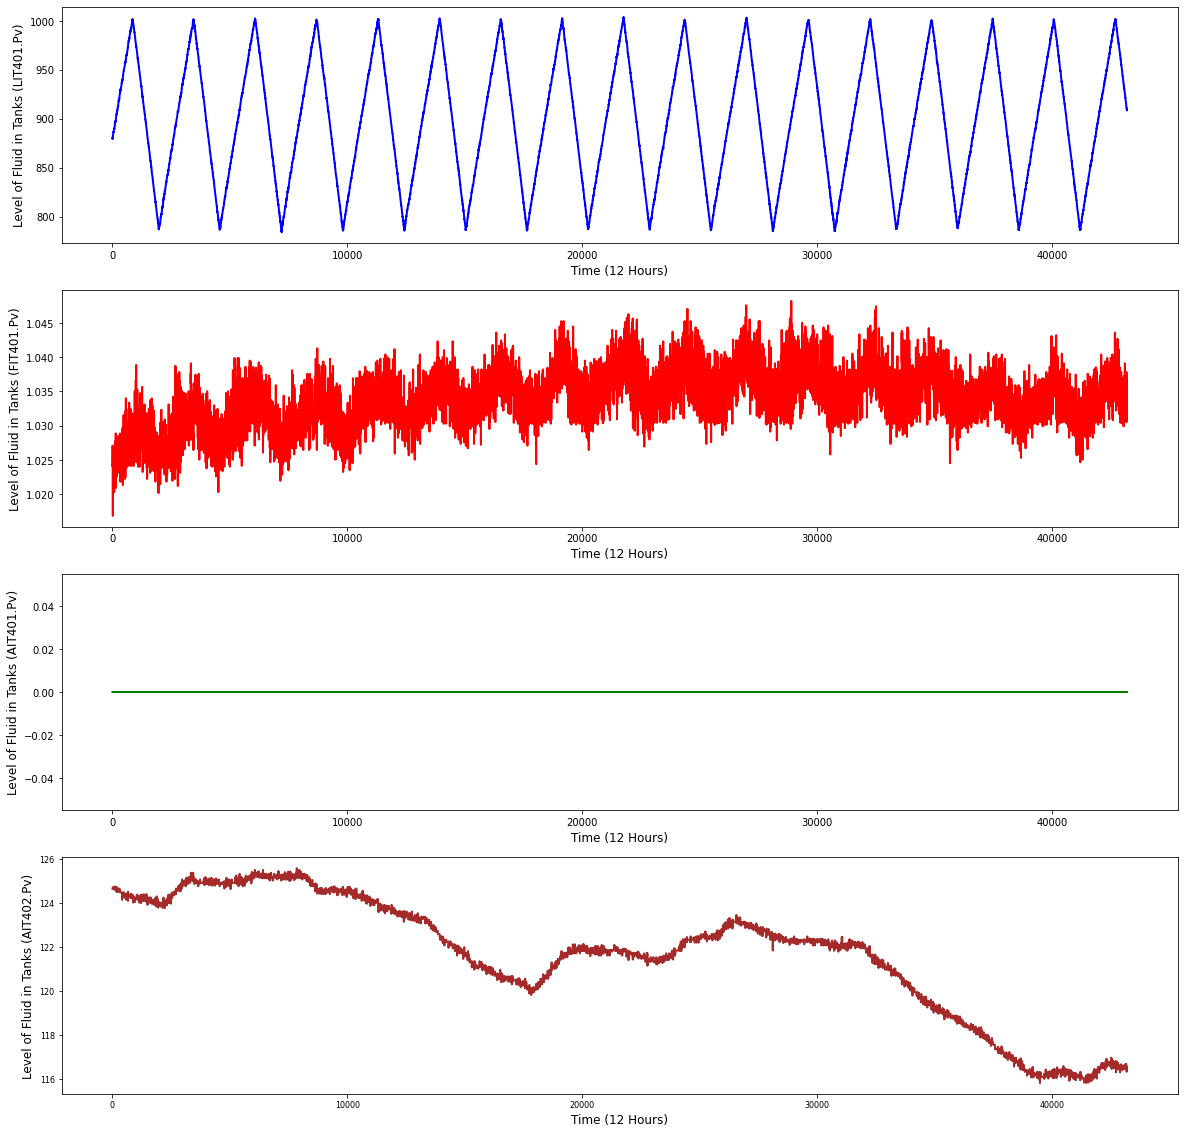

In [113]:
plt.figure(figsize=(20, 20))
ax1 = plt.subplot(4,1,1)
ax1.plot(p4_state['LIT401.Pv'],color = 'blue', linewidth=2)
ax1.set_xlabel('Time (12 Hours)', fontsize=12)
ax1.set_ylabel('Level of Fluid in Tanks (LIT401.Pv)', fontsize=12)

ax2 = plt.subplot(4,1,2)
ax2.plot(p4_state['FIT401.Pv'],color = 'red', linewidth=2)
ax2.set_xlabel('Time (12 Hours)', fontsize=12)
ax2.set_ylabel('Level of Fluid in Tanks (FIT401.Pv)', fontsize=12)

ax3 = plt.subplot(4,1,3)
ax3.plot(p4_state['AIT401.Pv'],color = 'green', linewidth=2)
ax3.set_xlabel('Time (12 Hours)', fontsize=12)
ax3.set_ylabel('Level of Fluid in Tanks (AIT401.Pv)', fontsize=12)

ax4 = plt.subplot(4,1,4)
ax4.plot(p4_state['AIT402.Pv'],color = 'brown', linewidth=2)
ax4.set_xlabel('Time (12 Hours)', fontsize=12)
ax4.set_ylabel('Level of Fluid in Tanks (AIT402.Pv)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

### P5 State

In [114]:
p5_state = data[['t_stamp','P5_STATE', 'FIT501.Pv', 'FIT502.Pv','FIT503.Pv', 'FIT504.Pv', 'AIT501.Pv', 'AIT502.Pv', 'AIT503.Pv',
                 'AIT504.Pv', 'PIT501.Pv', 'PIT502.Pv', 'PIT503.Pv', 'P501.Status','P501.Speed', 'P502.Status', 'P502.Speed',
                   'MV501.Status','MV502.Status', 'MV503.Status', 'MV504.Status']]
p5_state = p5_state[:43200]
p5_state.head()

,t_stamp,P5_STATE,FIT501.Pv,FIT502.Pv,FIT503.Pv,FIT504.Pv,AIT501.Pv,AIT502.Pv,AIT503.Pv,AIT504.Pv,...,PIT502.Pv,PIT503.Pv,P501.Status,P501.Speed,P502.Status,P502.Speed,MV501.Status,MV502.Status,MV503.Status,MV504.Status
0,2024-05-06 17:00:00,12,1.03089,0.723453,0.223282,0.05086,7.967381,229.325821,144.514221,14.034862,...,0.0,204.034225,2,10,1,0,2,2,1,1
1,2024-05-06 17:00:01,12,1.03089,0.721148,0.223282,0.05086,7.967381,229.325821,144.514221,14.034862,...,0.0,204.034225,2,10,1,0,2,2,1,1
2,2024-05-06 17:00:02,12,1.03089,0.720123,0.223282,0.05086,7.967701,229.325821,144.514221,14.034862,...,0.0,204.034225,2,10,1,0,2,2,1,1
3,2024-05-06 17:00:03,12,1.03089,0.710260,0.223282,0.05086,7.969944,229.325821,144.514221,14.034862,...,0.0,204.034225,2,10,1,0,2,2,1,1
4,2024-05-06 17:00:04,12,1.03089,0.709363,0.222642,0.05118,7.972187,229.325821,144.514221,14.034862,...,0.0,204.034225,2,10,1,0,2,2,1,1


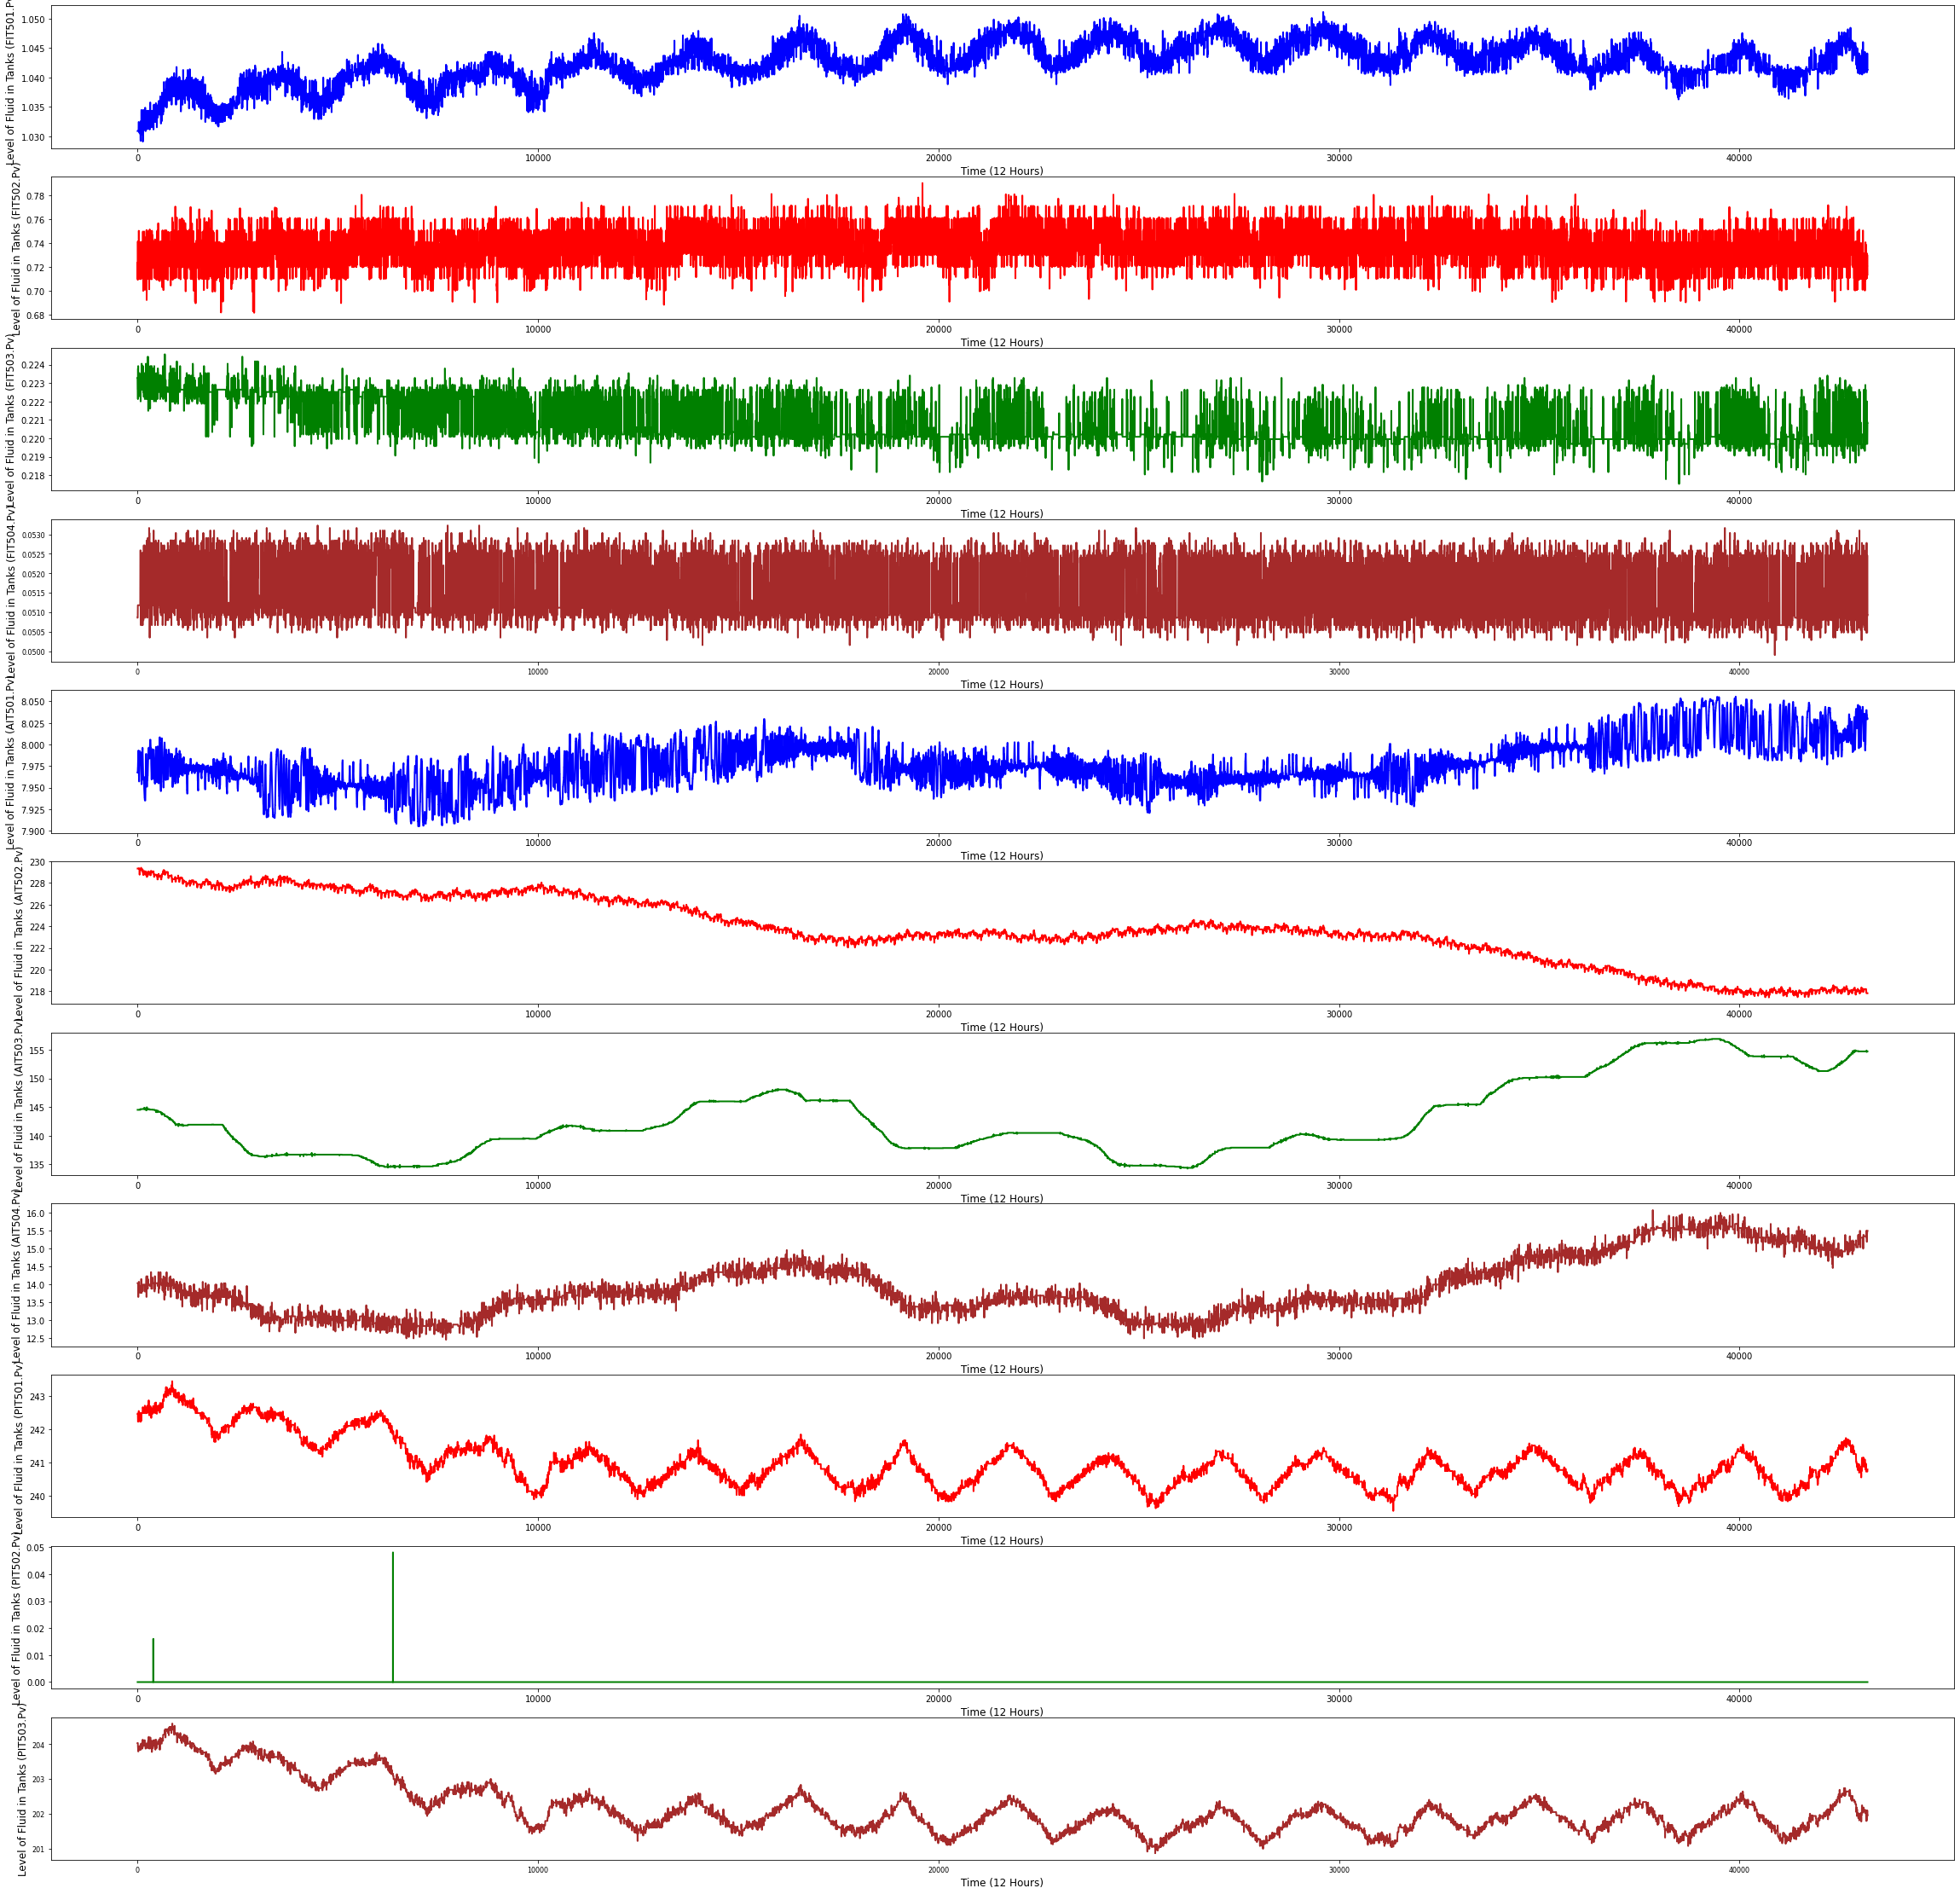

In [115]:
plt.figure(figsize=(40, 40))
ax1 = plt.subplot(11,1,1)
ax1.plot(p5_state['FIT501.Pv'],color = 'blue', linewidth=2)
ax1.set_xlabel('Time (12 Hours)', fontsize=12)
ax1.set_ylabel('Level of Fluid in Tanks (FIT501.Pv)', fontsize=12)

ax2 = plt.subplot(11,1,2)
ax2.plot(p5_state['FIT502.Pv'],color = 'red', linewidth=2)
ax2.set_xlabel('Time (12 Hours)', fontsize=12)
ax2.set_ylabel('Level of Fluid in Tanks (FIT502.Pv)', fontsize=12)

ax3 = plt.subplot(11,1,3)
ax3.plot(p5_state['FIT503.Pv'],color = 'green', linewidth=2)
ax3.set_xlabel('Time (12 Hours)', fontsize=12)
ax3.set_ylabel('Level of Fluid in Tanks (FIT503.Pv)', fontsize=12)

ax4 = plt.subplot(11,1,4)
ax4.plot(p5_state['FIT504.Pv'],color = 'brown', linewidth=2)
ax4.set_xlabel('Time (12 Hours)', fontsize=12)
ax4.set_ylabel('Level of Fluid in Tanks (FIT504.Pv)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax5 = plt.subplot(11,1,5)
ax5.plot(p5_state['AIT501.Pv'],color = 'blue', linewidth=2)
ax5.set_xlabel('Time (12 Hours)', fontsize=12)
ax5.set_ylabel('Level of Fluid in Tanks (AIT501.Pv)', fontsize=12)

ax6 = plt.subplot(11,1,6)
ax6.plot(p5_state['AIT502.Pv'],color = 'red', linewidth=2)
ax6.set_xlabel('Time (12 Hours)', fontsize=12)
ax6.set_ylabel('Level of Fluid in Tanks (AIT502.Pv)', fontsize=12)

ax7 = plt.subplot(11,1,7)
ax7.plot(p5_state['AIT503.Pv'],color = 'green', linewidth=2)
ax7.set_xlabel('Time (12 Hours)', fontsize=12)
ax7.set_ylabel('Level of Fluid in Tanks (AIT503.Pv)', fontsize=12)

ax8 = plt.subplot(11,1,8)
ax8.plot(p5_state['AIT504.Pv'],color = 'brown', linewidth=2)
ax8.set_xlabel('Time (12 Hours)', fontsize=12)
ax8.set_ylabel('Level of Fluid in Tanks (AIT504.Pv)', fontsize=12)

ax9 = plt.subplot(11,1,9)
ax9.plot(p5_state['PIT501.Pv'],color = 'red', linewidth=2)
ax9.set_xlabel('Time (12 Hours)', fontsize=12)
ax9.set_ylabel('Level of Fluid in Tanks (PIT501.Pv)', fontsize=12)

ax10 = plt.subplot(11,1,10)
ax10.plot(p5_state['PIT502.Pv'],color = 'green', linewidth=2)
ax10.set_xlabel('Time (12 Hours)', fontsize=12)
ax10.set_ylabel('Level of Fluid in Tanks (PIT502.Pv)', fontsize=12)

ax11 = plt.subplot(11,1,11)
ax11.plot(p5_state['PIT503.Pv'],color = 'brown', linewidth=2)
ax11.set_xlabel('Time (12 Hours)', fontsize=12)
ax11.set_ylabel('Level of Fluid in Tanks (PIT503.Pv)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

### P6 State

In [116]:
p6_state = data[['t_stamp','P6_STATE', 'LIT601.Pv','LIT602.Pv', 'FIT601.Pv', 'FIT602.Pv', 'P601.Status', 'P602.Status',
                 'P603.Status', 'LSH601.Alarm', 'LSL601.Alarm', 'LSH602.Alarm','LSL602.Alarm', 'LSH603.Alarm', 'LSL603.Alarm']]
p6_state = p6_state[:43200]
p6_state.head()

,t_stamp,P6_STATE,LIT601.Pv,LIT602.Pv,FIT601.Pv,FIT602.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,2024-05-06 17:00:00,2,423.545258,563.1248,0.0,2.578893,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
1,2024-05-06 17:00:01,2,423.288900,563.1248,0.0,2.580335,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
2,2024-05-06 17:00:02,2,423.288900,563.6375,0.0,2.582097,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
3,2024-05-06 17:00:03,2,422.231476,563.6375,0.0,2.587864,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
4,2024-05-06 17:00:04,2,420.821600,562.8364,0.0,2.590747,2,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active


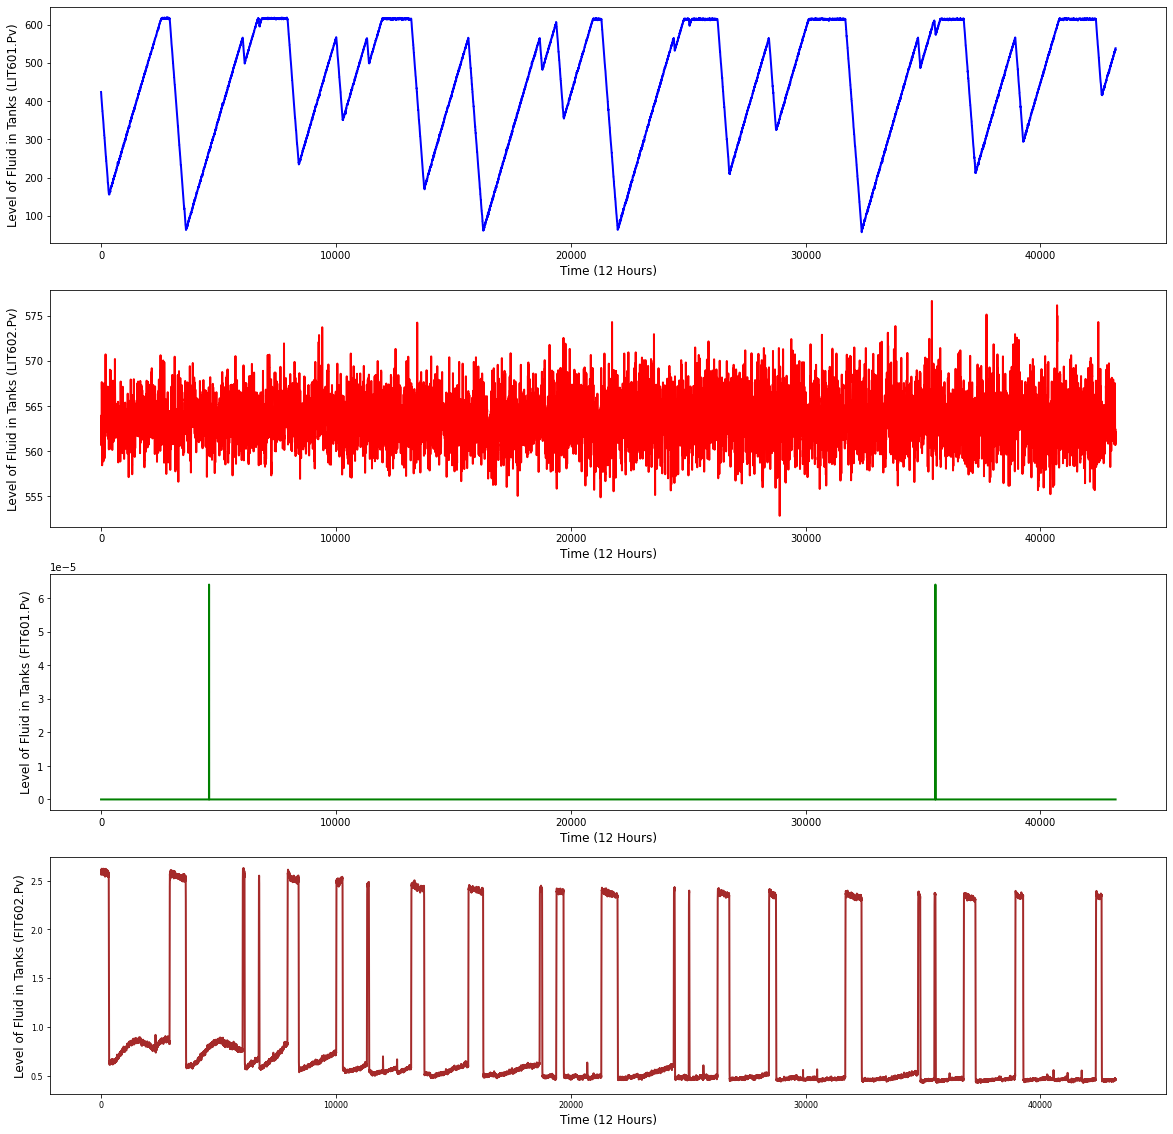

In [117]:
plt.figure(figsize=(20, 20))
ax1 = plt.subplot(4,1,1)
ax1.plot(p6_state['LIT601.Pv'],color = 'blue', linewidth=2)
ax1.set_xlabel('Time (12 Hours)', fontsize=12)
ax1.set_ylabel('Level of Fluid in Tanks (LIT601.Pv)', fontsize=12)

ax2 = plt.subplot(4,1,2)
ax2.plot(p6_state['LIT602.Pv'],color = 'red', linewidth=2)
ax2.set_xlabel('Time (12 Hours)', fontsize=12)
ax2.set_ylabel('Level of Fluid in Tanks (LIT602.Pv)', fontsize=12)

ax3 = plt.subplot(4,1,3)
ax3.plot(p6_state['FIT601.Pv'],color = 'green', linewidth=2)
ax3.set_xlabel('Time (12 Hours)', fontsize=12)
ax3.set_ylabel('Level of Fluid in Tanks (FIT601.Pv)', fontsize=12)

ax4 = plt.subplot(4,1,4)
ax4.plot(p6_state['FIT602.Pv'],color = 'brown', linewidth=2)
ax4.set_xlabel('Time (12 Hours)', fontsize=12)
ax4.set_ylabel('Level of Fluid in Tanks (FIT602.Pv)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

## Observations 
* From my observation, all the columns with float64 datatype have a scalar value and these need to be scaled in the range (0,1). 
* All the int64 values are categorical some ranging from (0,5)
* We need to encode them so as to use for training. 
* All the columns which has *.Alarm can be considered as the output variables. We probably need to categorize them into 0,1.
* For more understanding on the data, we need to correlation plots between the int, float columns with the Alarm columns.  

In [ ]:
int_df = data.select_dtypes(include='int64')
print(int_df.columns)
float_df = data.select_dtypes(include='float64')
print(float_df.columns)
alarm = data.select_dtypes(include='object')
print(alarm.columns)